In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

# Load Data

In [2]:
metrics = pd.read_csv(
    "../metrics.csv"
)
metrics = metrics[metrics["split_path"] == "cv_split_base_and_prev_comps_XCsnipet28032025_group_allbirds_hdf5.npy"].reset_index(drop=True)
metrics = metrics[metrics["Public"] > 0.7].reset_index(drop=True)

metrics["Folds Roc AUC"] = metrics["Folds Roc AUC"].apply(eval) 

# Utils

In [3]:
def plot_score_correlation(df, leaderboard_col, local_val_col, figsize=(8, 6)):
    """
    Plots a scatter plot of local validation scores vs leaderboard scores.
    
    Args:
        df (pd.DataFrame): DataFrame containing the metrics.
        leaderboard_col (str): Column name for leaderboard scores.
        local_val_col (str): Column name for local validation scores.
        figsize (tuple): Size of the figure.
    """
    x = df[local_val_col]
    y = df[leaderboard_col]
    
    plt.figure(figsize=figsize)
    plt.scatter(x, y, alpha=0.7)
    plt.plot([x.min(), x.max()], [y.min(), y.max()], color='red', linestyle='--', label='y = x')
    
    plt.xlabel(local_val_col)
    plt.ylabel(leaderboard_col)
    plt.title('Correlation between Local Validation and Leaderboard Scores')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

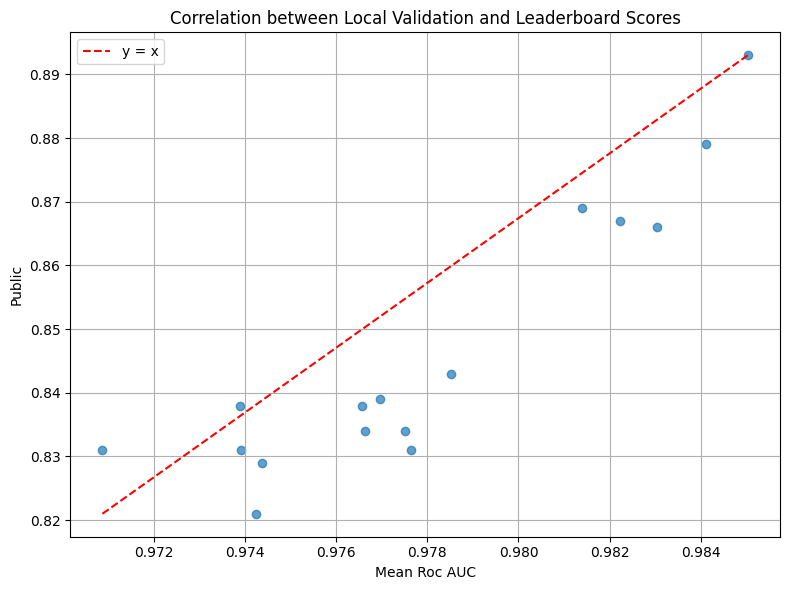

In [4]:
plot_score_correlation(
    df=metrics,
    local_val_col="Mean Roc AUC",
    leaderboard_col="Public"
)

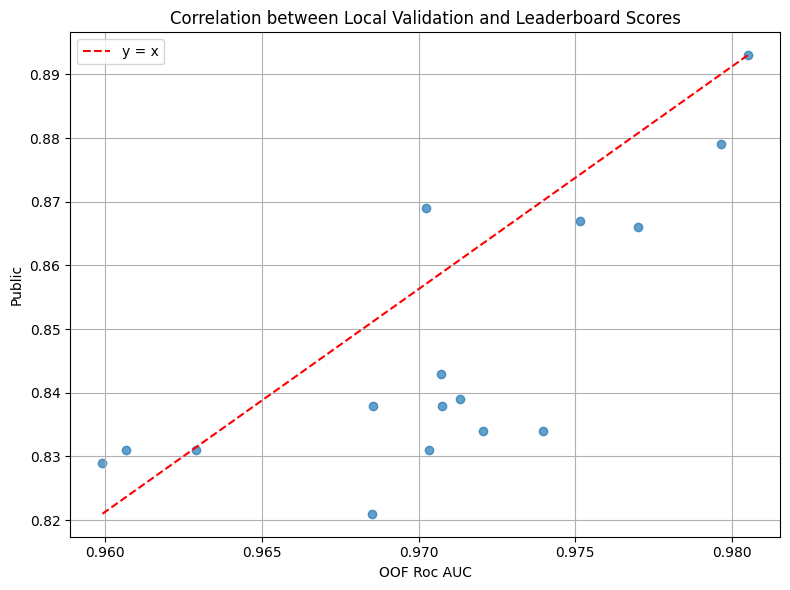

In [5]:
plot_score_correlation(
    df=metrics,
    local_val_col="OOF Roc AUC",
    leaderboard_col="Public"
)

In [6]:
def plot_fold_auc_individual_histograms(df, fold_auc_col, bins=20, figsize=(8, 3)):
    """
    Plots individual histograms of ROC AUCs per fold in a vertical column layout,
    and prints useful statistics for each fold including mean, std, min, max, IQR, and median.

    Args:
        df (pd.DataFrame): DataFrame containing the fold AUC scores.
        fold_auc_col (str): Column name with List[float] per row (e.g., ROC AUCs per fold).
        bins (int): Number of bins for histograms.
        figsize (tuple): Size of each subplot (width, height).
    """
    fold_values = df[fold_auc_col].dropna().tolist()
    n_folds = max(len(folds) for folds in fold_values)

    # Collect AUCs per fold
    per_fold_aucs = [[] for _ in range(n_folds)]
    for folds in fold_values:
        for i, auc in enumerate(folds):
            per_fold_aucs[i].append(auc)

    # Create vertical subplots
    fig, axs = plt.subplots(n_folds, 1, figsize=(figsize[0], figsize[1] * n_folds))

    for i, (fold_aucs, ax) in enumerate(zip(per_fold_aucs, axs)):
        ax.hist(fold_aucs, bins=bins, alpha=0.75, edgecolor='black')
        ax.set_title(f'Fold {i} Histogram')
        ax.set_xlabel('ROC AUC')
        ax.set_ylabel('Frequency')
        ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    # Print stats
    print("\nFold-wise Statistics:")
    for i, fold_aucs in enumerate(per_fold_aucs):
        fold_aucs = np.array(fold_aucs)
        mean = fold_aucs.mean()
        std = fold_aucs.std()
        median = np.median(fold_aucs)
        q1 = np.percentile(fold_aucs, 25)
        q3 = np.percentile(fold_aucs, 75)
        iqr = q3 - q1
        print(
            f"Fold {i}: "
            f"mean={mean:.4f}, std={std:.4f}, median={median:.4f}, "
            f"min={fold_aucs.min():.4f}, max={fold_aucs.max():.4f}, IQR={iqr:.4f}"
        )


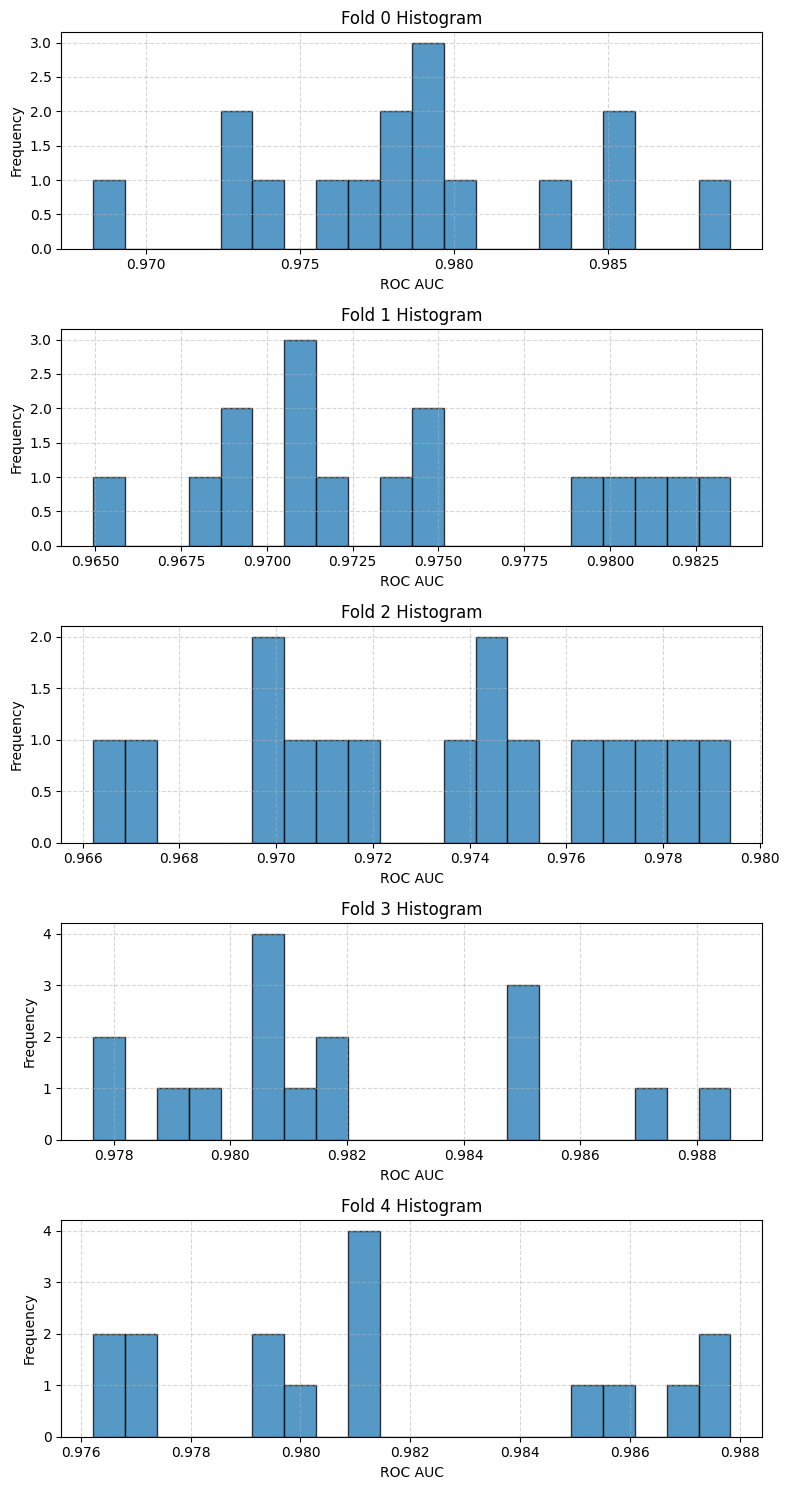


Fold-wise Statistics:
Fold 0: mean=0.9786, std=0.0052, median=0.9784, min=0.9683, max=0.9890, IQR=0.0054
Fold 1: mean=0.9741, std=0.0055, median=0.9728, min=0.9649, max=0.9835, IQR=0.0097
Fold 2: mean=0.9734, std=0.0038, median=0.9741, min=0.9662, max=0.9794, IQR=0.0058
Fold 3: mean=0.9821, std=0.0031, median=0.9811, min=0.9776, max=0.9886, IQR=0.0045
Fold 4: mean=0.9815, std=0.0038, median=0.9812, min=0.9762, max=0.9878, IQR=0.0066


In [7]:
plot_fold_auc_individual_histograms(
    df=metrics,
    fold_auc_col="Folds Roc AUC",
)

# Pick Best Models

In [11]:
metrics.set_index("exp_name").sort_values("Public", ascending=False)["Public"]

exp_name
eca_nfnet_l0_Exp_noamp_64bs_5sec_mixupP05_RandomFiltering_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_BackGroundSoundScapeORESC50P05_SpecAugV1_FocalBCELoss_5Folds_ScoredPrevCompsAndXCsnipet28032025_FromV2Y2025Last_PseudoV1PT05MT01P04    0.893
eca_nfnet_l1_Exp_DPR02_64bs_5sec_mixupP05_RandomFiltering_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_BackGroundSoundScapeORESC50P05_SpecAugV1_FocalBCELoss_5Folds_ScoredPrevCompsAndXCsnipet28032025_FromV2Y2025Last                        0.879
eca_nfnet_l0_Exp_noamp_64bs_5sec_mixupP05_RandomFiltering_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_BackGroundSoundScapeORESC50P05_SpecAugV1_FocalBCELoss_5Folds_ScoredPrevCompsAndXCsnipet28032025_FromPreca4                             0.869
eca_nfnet_l0_Exp_noamp_64bs_5sec_mixupP05_RandomFiltering_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_BackGroundSoundScapeORESC50P05_SpecAugV1_FocalBCELoss_5Folds_ScoredPrevCompsAndXCsnipet28032025_FromPreca4_CurV1                       0.867
eca_nfn